In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [21]:
def show_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

In [22]:
def show_images(image_paths, titles=None, cols=3):
    n_images = len(image_paths)
    rows = (n_images + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
        if titles:
            plt.title(titles[i])
    
    plt.show()

In [23]:
data_path = "C:/Users/laptop/Downloads/brain_mri_dataset/"
categories = ["no", "yes"]

images = []
labels = []

for category in categories:
    category_path = os.path.join(data_path, category)
    class_num = categories.index(category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (64, 64))
        images.append(img_resized)
        labels.append(class_num)

images = np.array(images).reshape(-1, 64, 64, 1) / 255.0
labels = np.array(labels)
labels = to_categorical(labels, num_classes=2)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

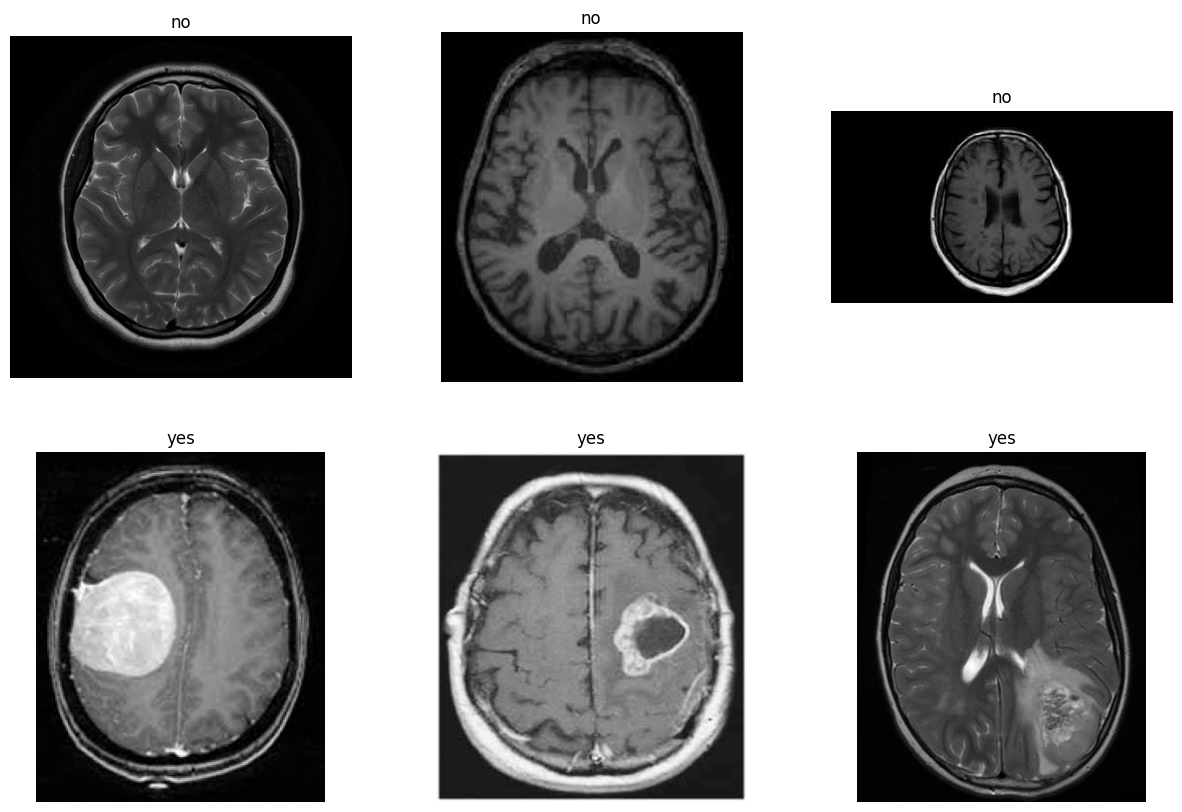

In [26]:
sample_image_paths = [
    os.path.join(data_path, categories[0], img_name) for img_name in os.listdir(os.path.join(data_path, categories[0]))[:3]
] + [
    os.path.join(data_path, categories[1], img_name) for img_name in os.listdir(os.path.join(data_path, categories[1]))[:3]
]
show_images(sample_image_paths, titles=['no']*3 + ['yes']*3)

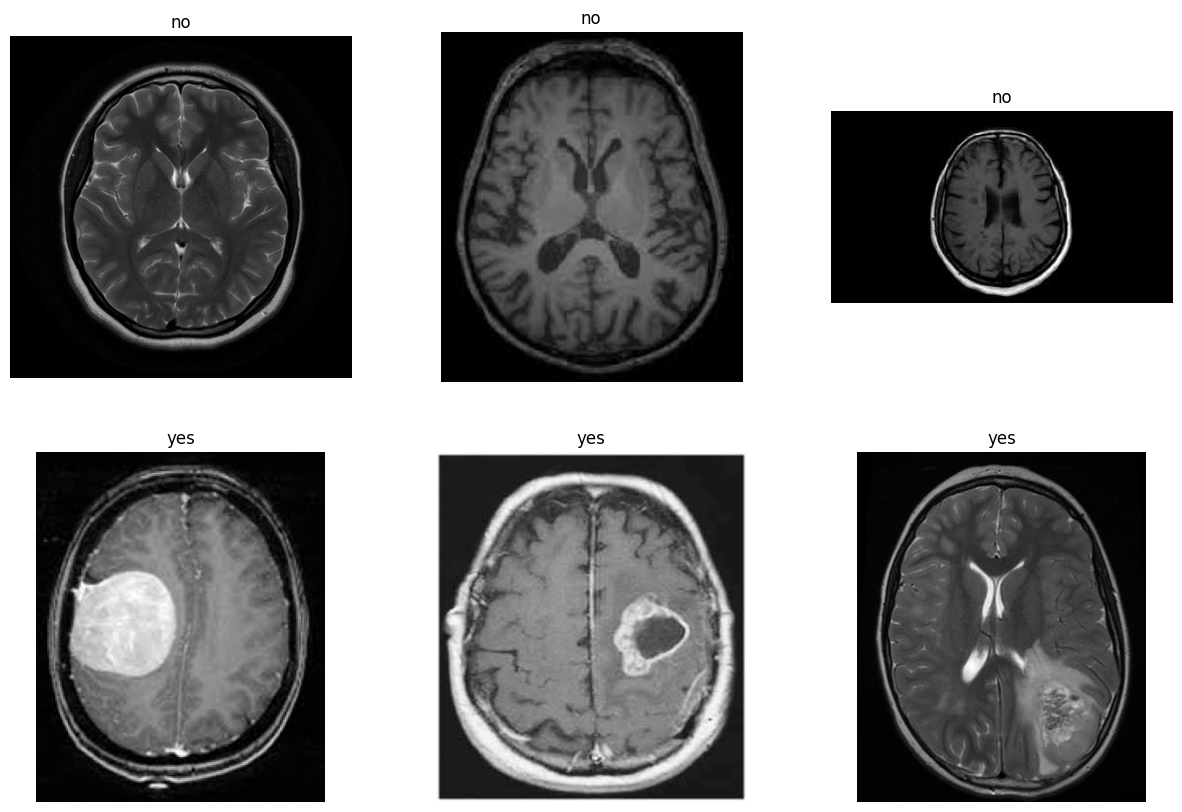

In [27]:
sample_image_paths = [
    os.path.join(data_path, categories[0], img_name) for img_name in os.listdir(os.path.join(data_path, categories[0]))[:3]
] + [
    os.path.join(data_path, categories[1], img_name) for img_name in os.listdir(os.path.join(data_path, categories[1]))[:3]
]
show_images(sample_image_paths, titles=['no']*3 + ['yes']*3)

In [28]:
model = Sequential()
model.add(Input(shape=(64, 64, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.6386 - loss: 0.6470 - val_accuracy: 0.3659 - val_loss: 0.7887
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5109 - loss: 0.7662 - val_accuracy: 0.7561 - val_loss: 0.4887
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7684 - loss: 0.5122 - val_accuracy: 0.8293 - val_loss: 0.4503
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7727 - loss: 0.4992 - val_accuracy: 0.8293 - val_loss: 0.4272
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7790 - loss: 0.4442 - val_accuracy: 0.8049 - val_loss: 0.4401
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7873 - loss: 0.5072 - val_accuracy: 0.8537 - val_loss: 0.4152
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7572 - loss: 0.4617 - val_accuracy: 0.8293 - val_loss: 0.3910
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7937 - loss: 0.4607 - val_accuracy: 0.8537 - val_loss: 0.373

In [31]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [32]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

In [33]:
report = classification_report(y_true, y_pred_classes, output_dict=True)
print("Classification Report:")
print(report)

Classification Report:
{'0': {'precision': 0.9333333333333333, 'recall': 0.7, 'f1-score': 0.8, 'support': 20.0}, '1': {'precision': 0.8333333333333334, 'recall': 0.967741935483871, 'f1-score': 0.8955223880597015, 'support': 31.0}, 'accuracy': 0.8627450980392157, 'macro avg': {'precision': 0.8833333333333333, 'recall': 0.8338709677419355, 'f1-score': 0.8477611940298508, 'support': 51.0}, 'weighted avg': {'precision': 0.8725490196078431, 'recall': 0.8627450980392157, 'f1-score': 0.8580626280362891, 'support': 51.0}}


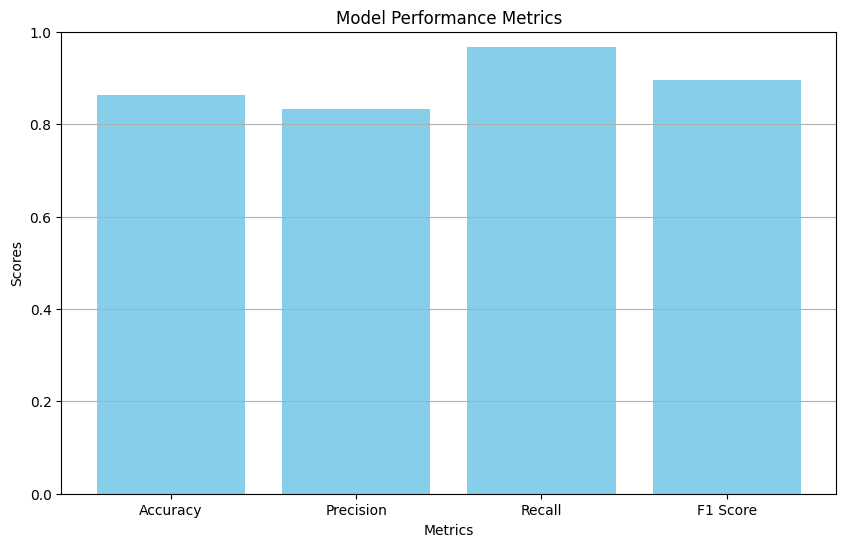

In [35]:
import matplotlib.pyplot as plt

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.grid(axis='y')

plt.savefig('performance_metrics.png')
plt.show()


In [37]:

import pandas as pd

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
}
df_metrics = pd.DataFrame(metrics)
from IPython.display import display
display(df_metrics)


,Metric,Score
0,Accuracy,0.862745
1,Precision,0.833333
2,Recall,0.967742
3,F1 Score,0.895522
